In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Legofinal.csv')

In [3]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


In [4]:
X = df.drop(['list_price'],axis=1)
X

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,2,277,4.0,0,4.5,0,4.0,20
1,19,2,168,4.0,2,5.0,0,4.0,20
2,19,11,74,4.3,2,4.3,0,4.1,20
3,5,23,1032,3.6,0,4.6,1,4.3,20
4,5,14,744,3.2,1,4.6,1,4.1,20
...,...,...,...,...,...,...,...,...,...
12256,23,6,341,4.4,2,4.3,38,4.2,19
12257,23,8,217,4.1,2,3.6,38,4.1,19
12258,23,18,233,4.6,2,4.6,38,4.5,19
12259,20,1,48,5.0,4,5.0,38,5.0,19


In [5]:
y = df[['list_price']]
y

,list_price
0,29.9900
1,19.9900
2,12.9900
3,99.9900
4,79.9900
...,...
12256,36.5878
12257,24.3878
12258,24.3878
12259,12.1878


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [7]:
cols = X_train.columns
cols

Index(['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

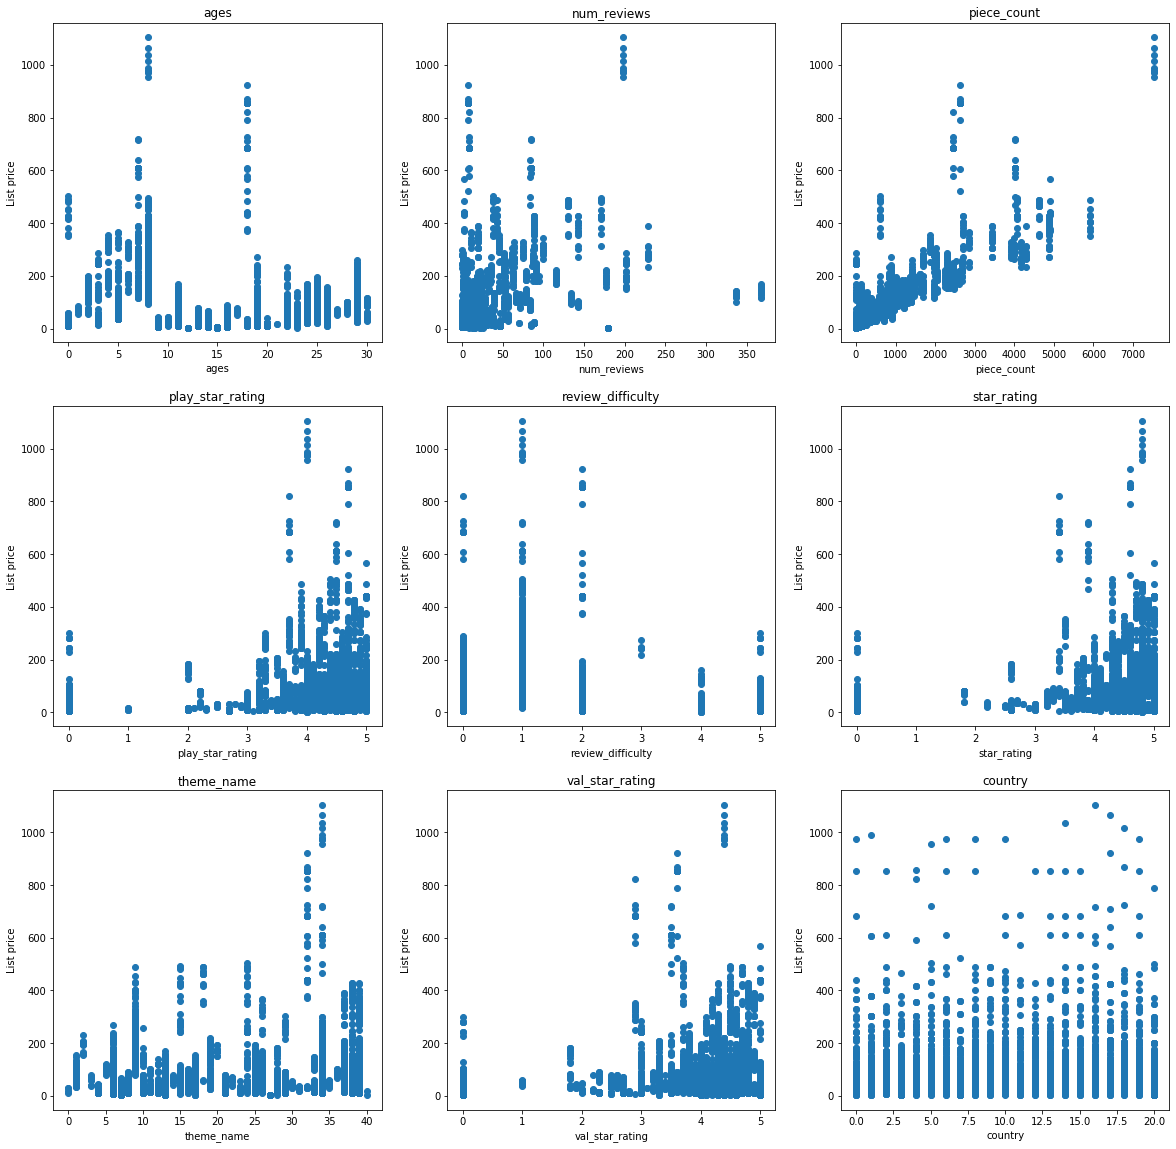

In [8]:
fig, axes = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3):
        col = cols[i*3 + j] #for first iteration i and j are zero so [0] is ages, then for i[0] j is 1 which is num reviews, i[1] j is 2 which is piece_count
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('List price')
        
plt.show()

In [9]:
#Reducing feature redundancies - keeping a threshold of 0.75 for inter feature correlation

corr = X_train.corr()
print(corr)

                       ages  num_reviews  piece_count  play_star_rating  \
ages               1.000000    -0.160969    -0.090685          0.232847   
num_reviews       -0.160969     1.000000     0.542924          0.151801   
piece_count       -0.090685     0.542924     1.000000          0.174411   
play_star_rating   0.232847     0.151801     0.174411          1.000000   
review_difficulty -0.239683    -0.196846    -0.312239         -0.670508   
star_rating        0.102633     0.160762     0.180903          0.902573   
theme_name         0.476178     0.012342     0.173318          0.151078   
val_star_rating    0.116349     0.172431     0.192863          0.921824   
country           -0.001526     0.001953     0.002506         -0.000958   

                   review_difficulty  star_rating  theme_name  \
ages                       -0.239683     0.102633    0.476178   
num_reviews                -0.196846     0.160762    0.012342   
piece_count                -0.312239     0.180903    0

In [10]:
#We see that features of play_star_rating, star_rating, val_star_rating are greater than 0.75, hence we drop those features
X_train.drop(['play_star_rating','val_star_rating'], 1 ,inplace=True)

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
X_test.drop(['play_star_rating','val_star_rating'],1,inplace=True)

In [12]:
X_test

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
9907,26,8,941,0,4.6,33,16
5243,11,0,19,5,0.0,13,7
8276,29,34,1376,1,4.3,34,12
6501,26,0,369,5,0.0,28,9
1619,11,1,19,5,4.0,13,0
...,...,...,...,...,...,...,...
2144,13,1,75,5,5.0,21,2
7242,26,21,494,0,4.5,38,10
11631,26,3,85,2,4.7,34,18
4639,11,3,28,2,5.0,13,6


In [13]:
#instantiating a linear regression and model fitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

r2 = r2_score(y_test,y_pred)
print("R2 score:",r2)

MSE: 2106.763431185767
R2 score: 0.7747160273433752


In [14]:
corr_check = X_train.corr()
corr_check

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
ages,1.000000,-0.160969,-0.090685,-0.239683,0.102633,0.476178,-0.001526
num_reviews,-0.160969,1.000000,0.542924,-0.196846,0.160762,0.012342,0.001953
piece_count,-0.090685,0.542924,1.000000,-0.312239,0.180903,0.173318,0.002506
review_difficulty,-0.239683,-0.196846,-0.312239,1.000000,-0.637901,-0.153948,0.006417
star_rating,0.102633,0.160762,0.180903,-0.637901,1.000000,0.065264,-0.003865
theme_name,0.476178,0.012342,0.173318,-0.153948,0.065264,1.000000,-0.003625
country,-0.001526,0.001953,0.002506,0.006417,-0.003865,-0.003625,1.000000


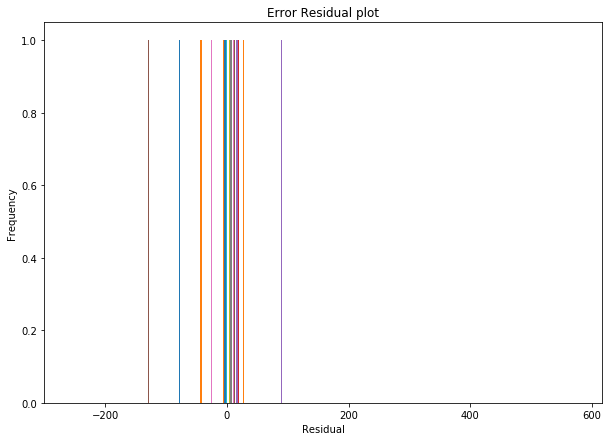

In [15]:
#Residual check
import seaborn as sns
residual = (y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(10,7))
plt.hist(residual, bins=20)
plt.xlabel("Residual")
plt.ylabel("Frequency")   
plt.title("Error Residual plot")
plt.show()